# Discrete Fourier Transform

In [1]:
%pip install -q matplotlib sympy numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nu = 4096
t = np.linspace(0, 2*np.pi, nu)
f = 3 + 4*np.sin(t)

<StemContainer object of 3 artists>

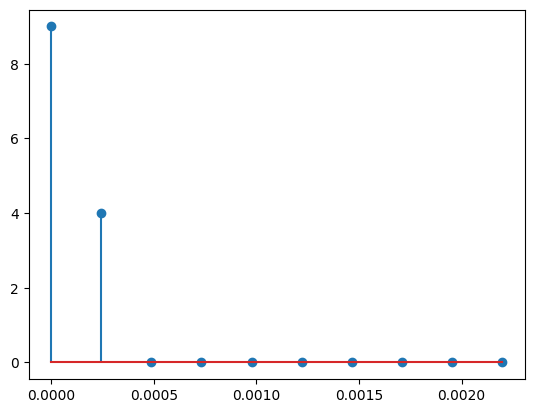

In [4]:
ak = np.fft.ifft(f)
freq = np.fft.fftfreq(nu, 1)
plt.stem(freq[0:10], np.abs(ak[0:10])**2)

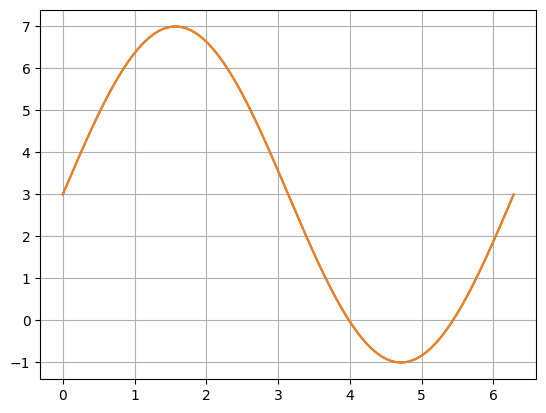

In [5]:
nu = 4096
t = np.linspace(0, 2*np.pi, nu)
f = 3 + 4*np.sin(t)

# f is 3*cos(0) + -4*(-sin(2*pi*t/tau)) 
                    # zero, 1st harmonic cos,        zero, 1st harmonic sin

# exp(-2*pi*i*k*t/tau) = cos(2*pi*i*k*t/tau) - i sin(2*pi*i*k*t/tau)

f2 = np.real(np.fft.fft([3, 0], nu)) + np.imag(np.fft.fft([0, -4], nu))
#f2 = np.conj(np.real(fft.ifft([1, 0], nu)) + np.imag(fft.ifft([1, 0], nu)))*nu

plt.plot(t, f)
plt.plot(t, f2)
plt.grid()

In [6]:
nu = 4
t = np.linspace(0, 2*np.pi, nu)
F = np.fft.fft(np.eye(nu))
print(np.round(F, 1))

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]
 [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j  0.-1.j]]


In [7]:
data = np.array([0, 1, 0, -1])

In [8]:
ak = np.linalg.inv(F).dot(data)
ak

array([0.+0.j , 0.+0.5j, 0.+0.j , 0.-0.5j])

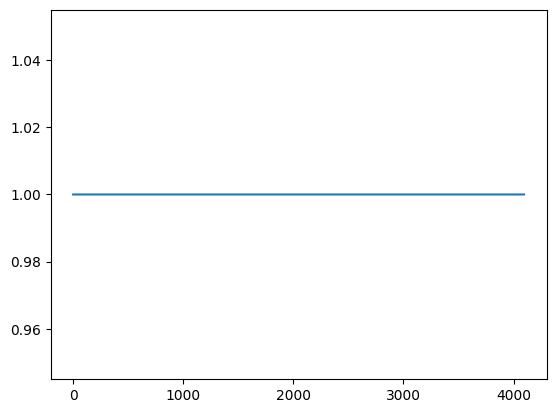

In [9]:
from numpy.fft import fft, ifft

f = np.fft.fft([1, 0], n=4096)
plt.plot(np.real(f))

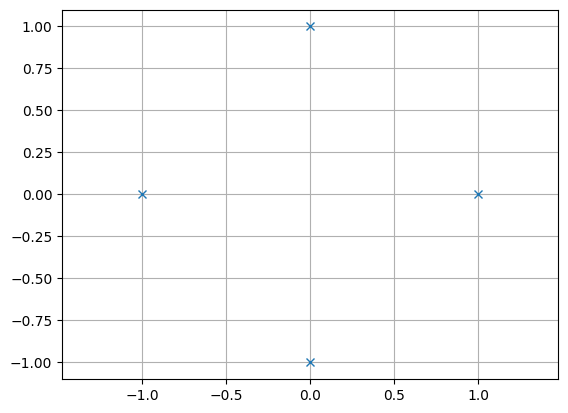

In [10]:
nu = 4
lam = np.exp(-1j*2*np.pi/nu)
z = lam**range(nu)
plt.plot(np.real(z), np.imag(z), 'x')
np.round(z, 2)
plt.grid()
plt.axis('equal');

In [11]:
def my_ift(x):
    nu = len(x)
    lam = np.exp(-1j*2*np.pi/nu)
    F = np.zeros((nu, nu), dtype=complex)
    ak_vect = np.hstack([np.arange(0, nu//2 + 1), -np.arange(nu//2 - (nu%2 == 0), 0, -1)])
    j_vect = np.arange(nu)
    for k in ak_vect:
        for j in j_vect:
            F[j, k] = lam**(k*j)
    return np.conj(F).dot(x)/nu

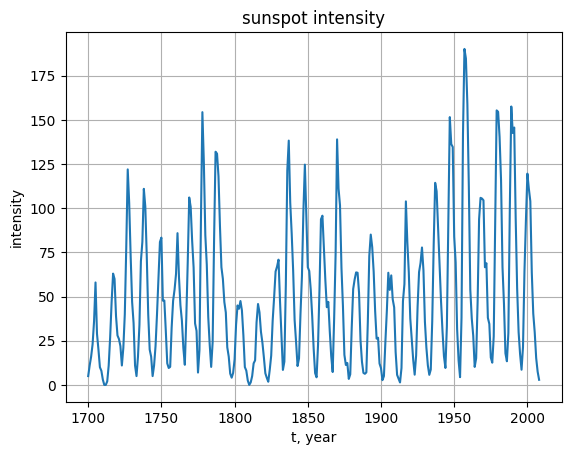

In [12]:
sunspot = np.genfromtxt('./data/sunspots.csv',
              delimiter=',', skip_header=1)
plt.plot(sunspot[:, 0], sunspot[:, 1])
plt.xlabel('t, year');
plt.ylabel('intensity')
plt.title('sunspot intensity')
plt.grid()

Text(0.5, 0, 'freq cycles/year')

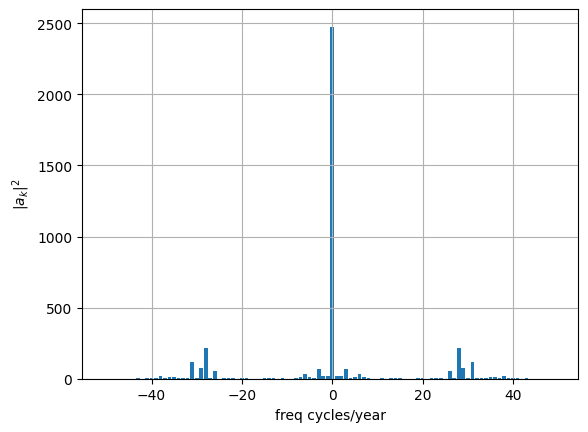

In [13]:
T0 = sunspot[-1, 0] - sunspot[0, 0]
ak = my_ift(sunspot[:, 1])
k = np.arange(-50, 50)
plt.bar(k, abs(ak[k])**2, width=0.8)
plt.grid()
plt.ylabel('$|a_k|^2$')
plt.xlabel('freq cycles/year')

In [14]:
np.abs(ak[30])

np.float64(2.4850696434232598)

In [15]:
k_max = np.argmax(ak[1:])
f_max = k_max/T0
p_max = 1/f_max
f_max, p_max

(np.float64(0.09740259740259741), np.float64(10.266666666666666))

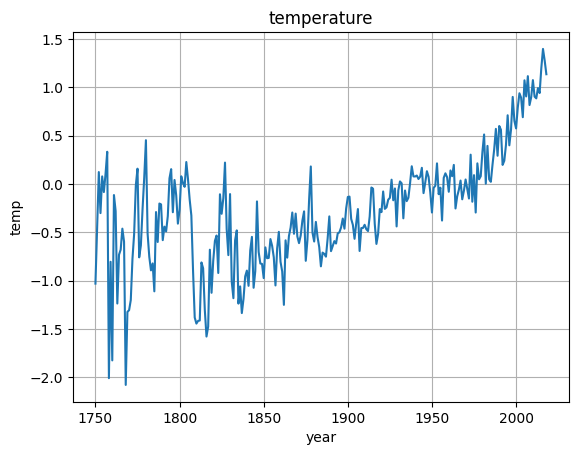

In [16]:
from datetime import datetime
temp = np.loadtxt(
    "./data/global_temp.txt",
    skiprows=22, dtype=float)
plt.plot(temp[:, 0], temp[:, 1])
plt.xlabel('year')
plt.ylabel('temp')
plt.grid()
plt.title('temperature')
temp;

dominant frequency 0.014925373134328358 cycles/year
dominant period 67.0 years/cycle
0.014925373134328358 (0.008510537691405189-0.1303208928383332j)


Text(0.5, 1.0, 'power spectrum')

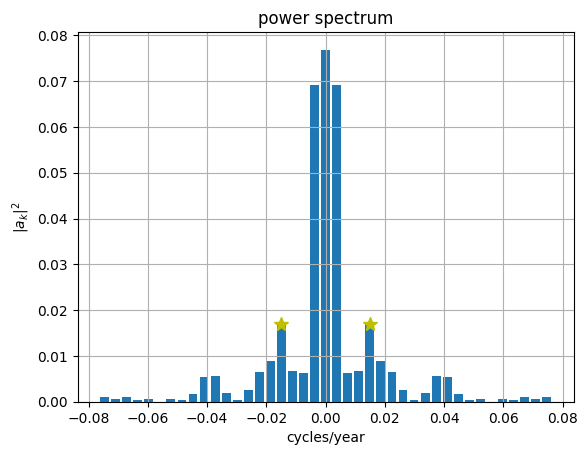

In [17]:
T0 = temp[-1, 0] - temp[0, 0]
nu = len(temp[:, 0])
ak = my_ift(temp[:, 1])
k = np.arange(-20, 21)

a0_skip = 2
k_max = np.argmax(np.abs(ak[a0_skip:nu//2])**2) + a0_skip
freq_max = k_max/T0
print('dominant frequency', freq_max, 'cycles/year')
print('dominant period', 1/freq_max, 'years/cycle')

plt.bar(k/T0, np.abs(ak[k])**2, width=0.8/T0);
plt.ylabel('$|a_k|^2$')
plt.xlabel('cycles/year')
plt.grid()
plt.plot([-freq_max, freq_max],
         np.abs(ak[k_max])**2*np.array([1, 1]), '*', markersize=10, color='y')
print(freq_max, ak[k_max])
plt.title('power spectrum')

Here we want to ignore the $a_0$ and $a_1$ term since they are a constant and the first harmonic which is not very interesting. The $a_1$ power is high, but this is talking aboug the global trend of temperature increase

# Reconstructing Sinusoids from FFT/IFFT

In [18]:
np.linalg.norm(fft([1, 4, 3, 1], 4096) - np.conj(ifft([1, 4, 3, 1], 4096))*4096)

np.float64(0.0)

In [19]:
fft([1, 2, 3], 4096) - np.conj(ifft([1, 2, 3], 4096))*4096

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j], shape=(4096,))

$ \cos(\theta) - i \sin(\theta) $

$ f = 3 + 10 \cos(3*t)$

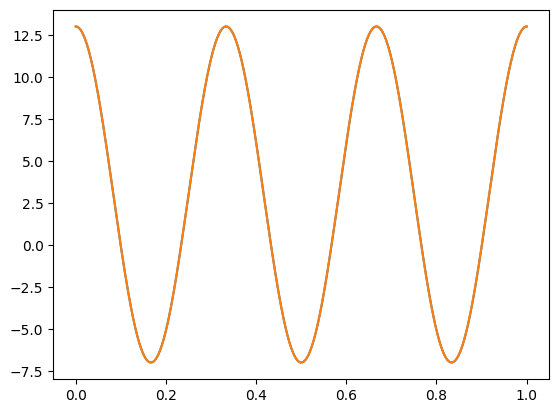

In [20]:
nu = 4096
tau = 1
w0 = 2*np.pi/tau
t = np.linspace(0, tau, nu)
p = np.real(fft([3, 0, 0, 10], 4096))
plt.plot(t, p, label='approx')
plt.plot(t, 3 + 10*np.cos(3*t*w0), label='orig')

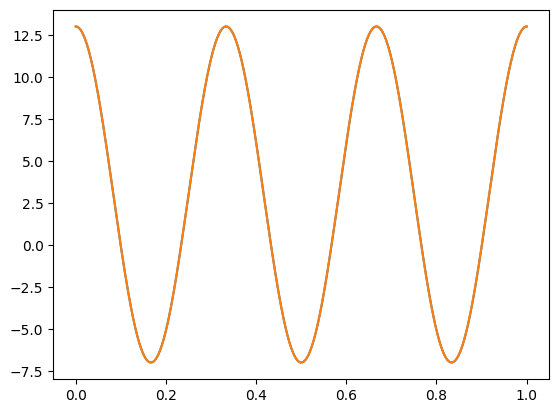

In [21]:
nu = 4096
tau = 1
w0 = 2*np.pi/tau
t = np.linspace(0, tau, nu)
p = np.real(ifft([3, 0, 0, 10], 4096))*4096
plt.plot(t, p, label='approx')
plt.plot(t, 3 + 10*np.cos(3*t*w0), label='orig')

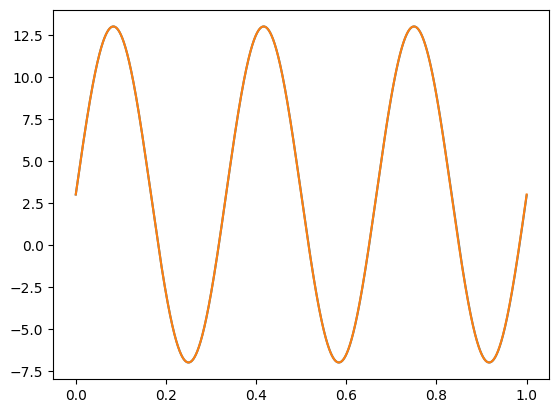

In [22]:
nu = 4096
tau = 1
w0 = 2*np.pi/tau
t = np.linspace(0, tau, nu)
p = np.real(ifft([3], 4096))*4096 + np.imag(ifft([0, 0, 0, 10], 4096))*4096
plt.plot(t, p, label='approx')
plt.plot(t, 3 + 10*np.sin(3*t*w0), label='orig')

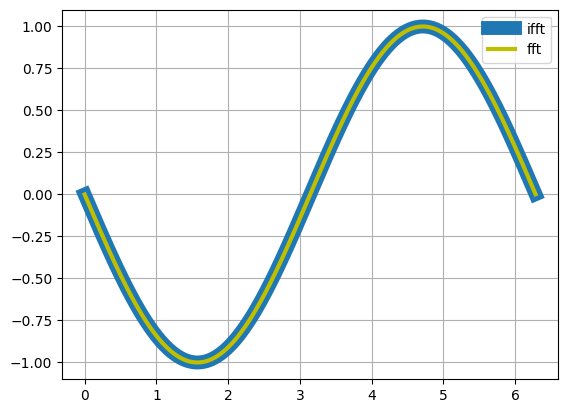

In [23]:
nu = 4096
t = np.linspace(0, 2*np.pi, nu)

plt.plot(t, nu*np.imag(np.fft.ifft([0, -1], nu)), linewidth=10, label='ifft');
plt.plot(t, np.imag(np.fft.fft([0, 1], nu)), linewidth=3, color='y', label='fft');
plt.legend()
plt.grid()

# Nyquist Sampling Theorem/ Aliasing

initial sample time: 0.1 seconds
sampling interval: 6.9 seconds


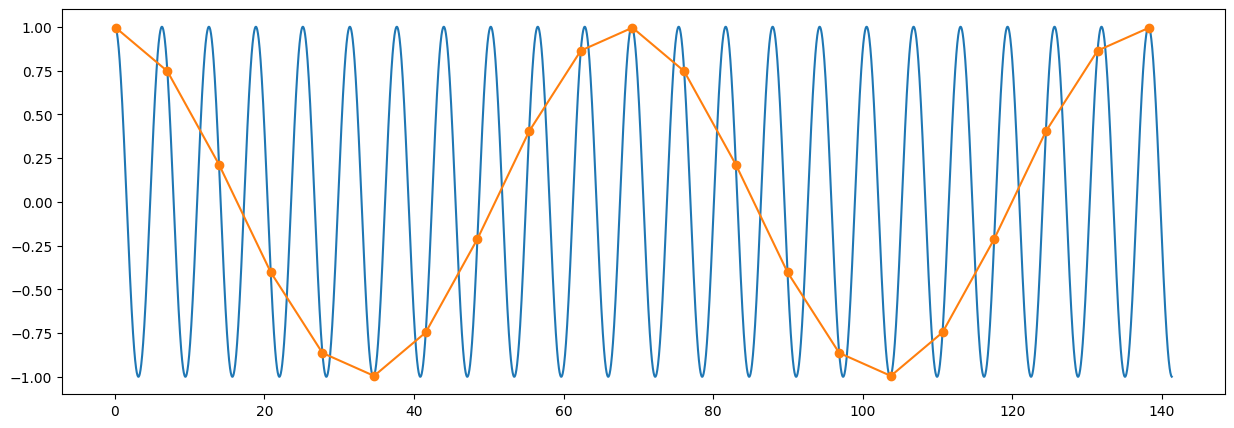

In [24]:
t = np.arange(0, 45*np.pi, np.pi/100)
T = 2*np.pi
dt = 1.1*T
t0 = 0.1

ts = np.arange(t0, 45*np.pi, dt)

plt.figure(figsize=(15, 5))
plt.plot(t, np.cos(t))
plt.plot(ts, np.cos(ts), 'o-')

print('initial sample time: {:0.2g} seconds'.format(t0))
print('sampling interval: {:0.2g} seconds'.format(dt))

# Image Processing 

In [25]:
def add_noise(data, n):
    data2 = np.copy(data)
    for i in range(n):
        j = np.random.randint(0, data2.shape[0])
        k = np.random.randint(0, data2.shape[1])
        data2[j, k] = int(255*np.random.rand())
    return data2

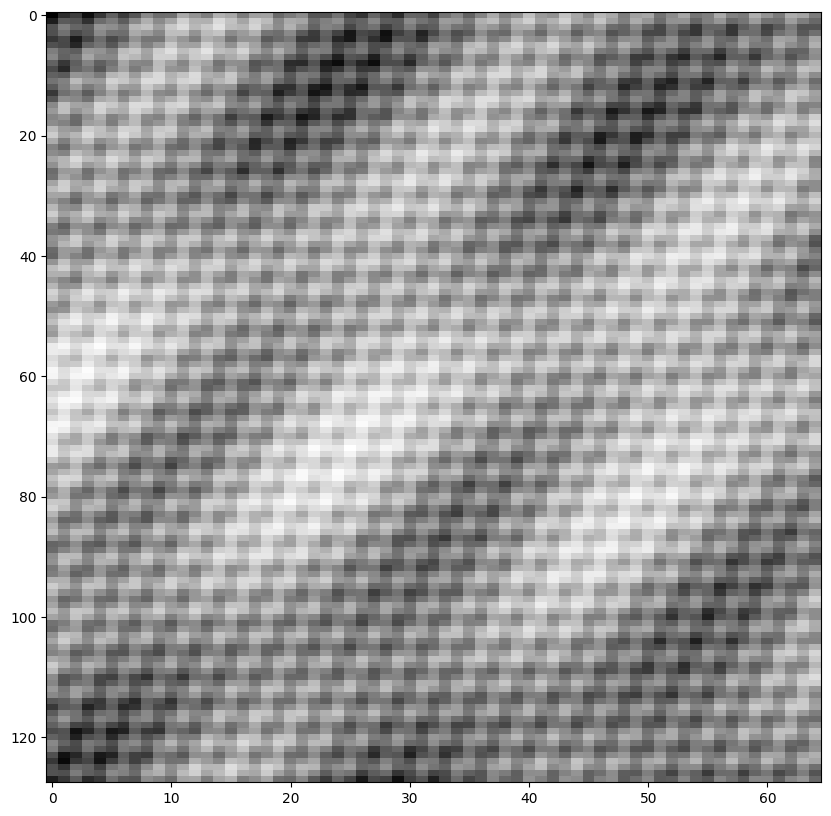

In [26]:
nu = 128
ak = np.zeros((nu, nu))
ak[0, 0] = 0
ak[1, 0] = 1
ak[0, 1] = 0
ak[1, 1] = 0
ak[3, 4] = 1
ak[1, 5] = 1
ak[29, 1] = 1
ak[10, 40] = 1
res = np.real(np.fft.rfft2(ak))
plt.figure(figsize=(10, 10))
plt.imshow(res, cmap='Greys')
plt.axis('tight');


In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def analyze_image(file, noise=0, cx=30, cy=30):
    img = cv2.imread(file, 0)  # read in image as greyscale, 0 means greyscale
    img = add_noise(img, noise)   # add noise to image

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # move a0 to the center of the image to make filtering easier

    fshift_orig = np.copy(fshift)  # make a copy so we can modify fshift
    mag_spectrum = 20*np.log10(np.abs(fshift_orig))  # magnitude in dB

    rows, cols = img.shape
    crow,ccol = rows//2 , cols//2
    
    # gaussian kernel
    colrow = np.array(np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0])))
    z = 1 - np.array(np.exp(-((colrow[1] - crow)**2/(2*cy**2) + (colrow[0] - ccol)**2/(2*cx**2))))   
    
    fshift_high = np.copy(fshift)
    
    fshift_high = np.multiply(fshift_high, z)  # high pass filter using gaussian
    #fshift_high[crow-cy:crow+cy, ccol-cx:ccol+cx] = 0  # high pass filter, set small ak's to zero

    mag_spectrum_high = 20*np.log10(np.abs(fshift_high) + 1e-20)
    f_ishift = np.fft.ifftshift(fshift_high)  # shift back s o in right form
    img_high = np.fft.ifft2(f_ishift)

    img_high = np.real(img_high)  # remove numerical complex numbers

    img_low = img - img_high
    mag_spectrum_low = 20*np.log10(np.abs(fshift_orig - fshift_high) + 1e-20)
    plt.
    vmin = 0
    vmax = 255
    
    print(np.min(img_low), np.max(img_low))
    print(np.min(img_high), np.max(img_high))

    plt.figure(figsize=(15, 4))
    plt.subplot(121),plt.imshow(img, cmap =plt. 'gray')
    plt.title('Input Image')
    plt.axis('tight')

    plt.subplot(122),plt.imshow(mag_spectrum, cmap = 'gray', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.axis('tight')
    plt.title('Magnitude Spectrum, dB, $20 log(|a_k|)$')
    plt.show()

    plt.figure(figsize=(15, 4))
    plt.subplot(121),plt.imshow(img_high, cmap = 'gray', vmin=-vmax, vmax=vmax)
    plt.title('Image after High Pass Filter')
    plt.axis('tight')

    plt.subplot(122), plt.imshow(mag_spectrum_high, cmap = 'gray', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.axis('tight')
    plt.title('Magnitude Spectrum, dB, $20 log(|a_k|)$')

    plt.figure(figsize=(15, 4))
    plt.subplot(121),plt.imshow(img_low, cmap = 'gray', vmin=vmin, vmax=vmax)
    plt.title('Image after Low Pass Filter')
    plt.axis('tight')

    plt.subplot(122), plt.imshow(mag_spectrum_low, cmap = 'gray', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.axis('tight')
    plt.title('Magnitude Spectrum, dB, $20 log(|a_k|)$')


SyntaxError: invalid syntax (3089360015.py, line 35)

47.999025644929915 195.38513154419203
-180.16967677469313 186.59630363348484


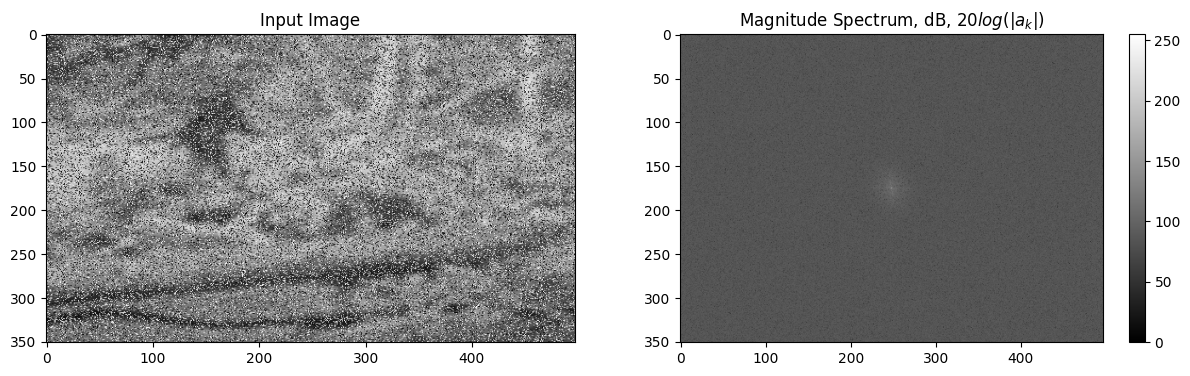

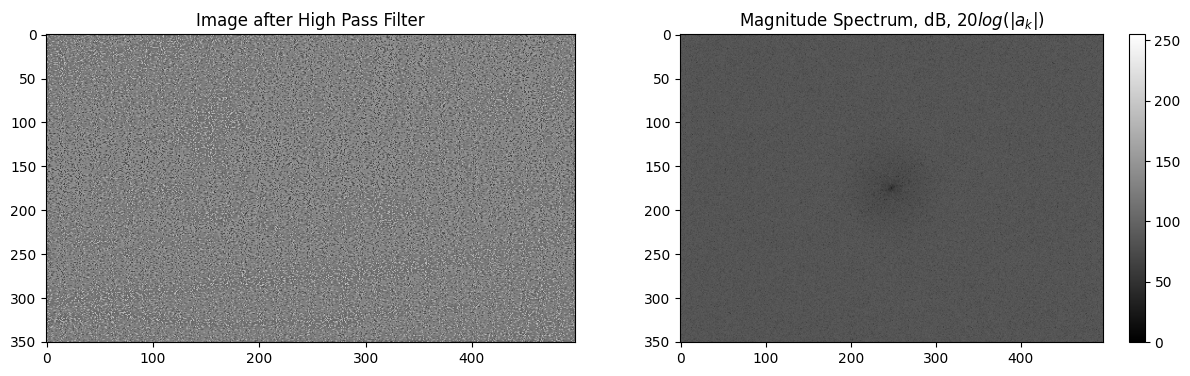

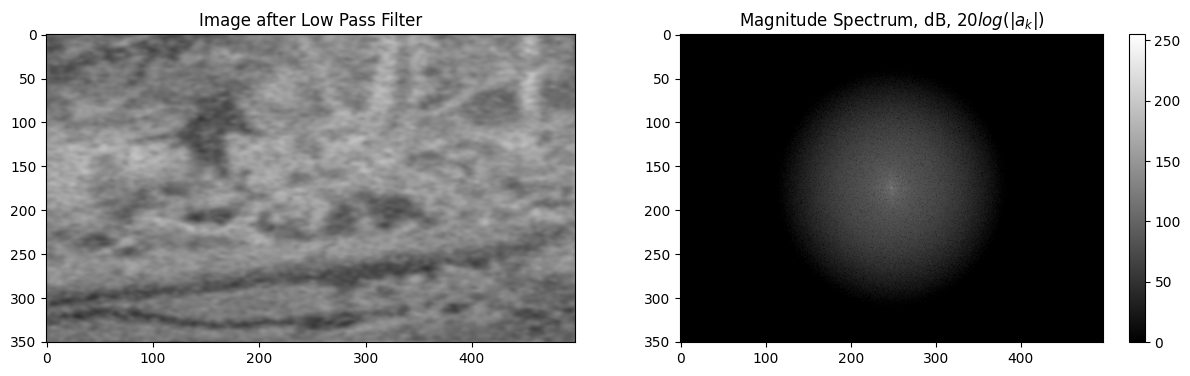

In [ ]:
analyze_image('./data/bigfoot.png', noise=100000, cx=30, cy=30)

-0.00021607081904322615 174.08057129632277
-142.27140806315467 163.62149821958806


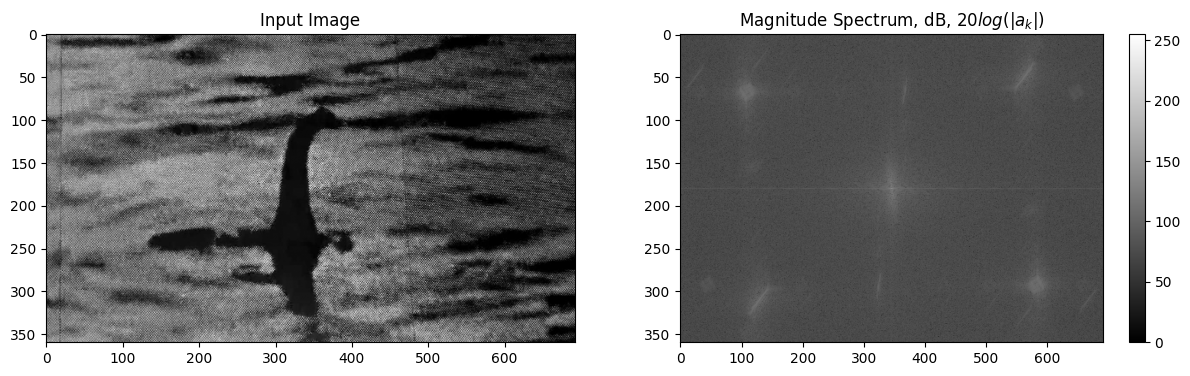

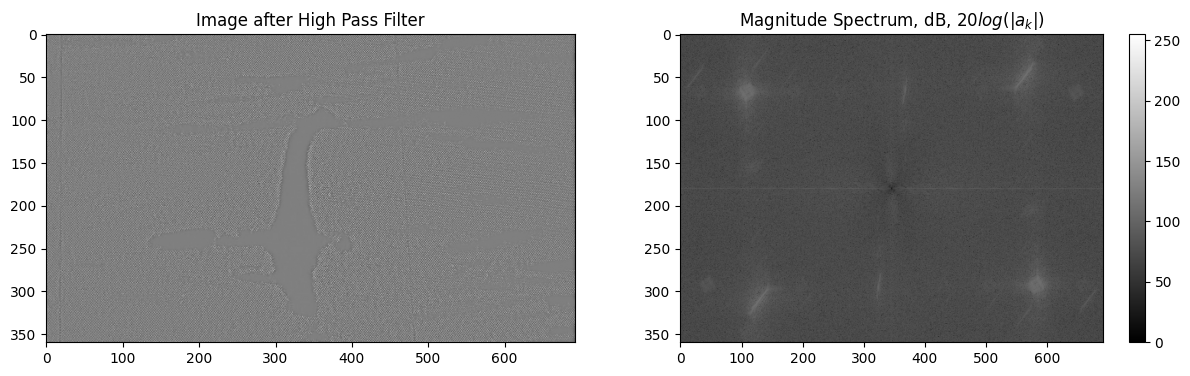

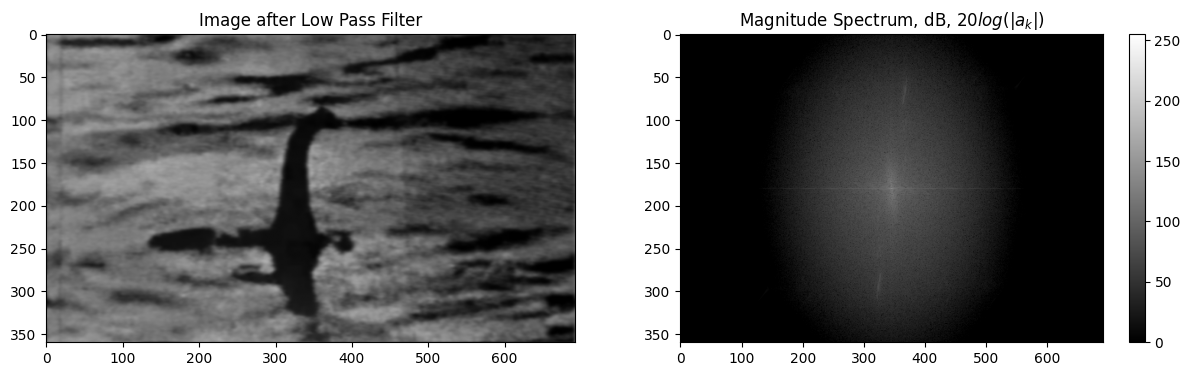

In [ ]:
analyze_image('./data/nessy.jpg', noise=0, cx=50, cy=50)

66.88659884536933 197.55500515289344
-193.4932269813339 187.5979040264425


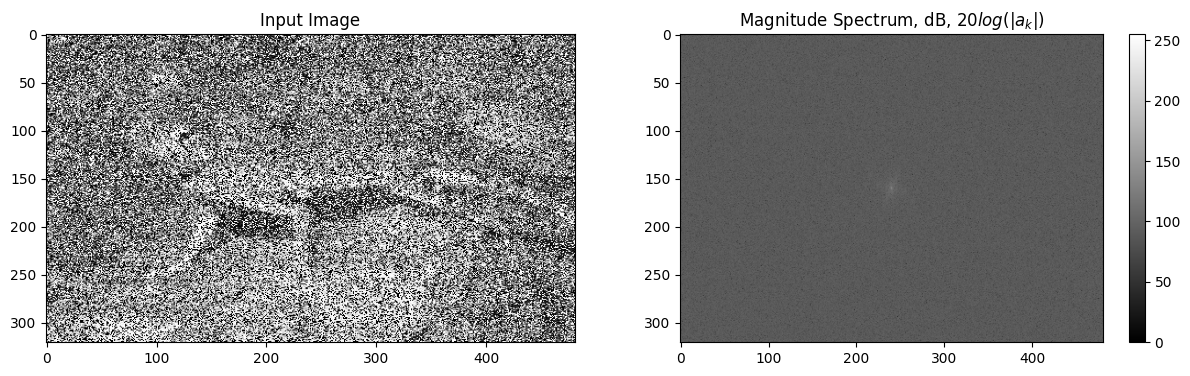

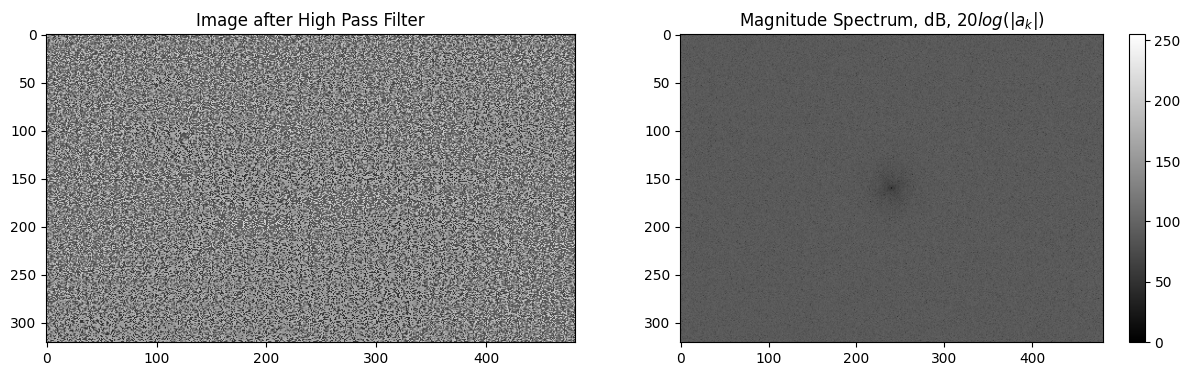

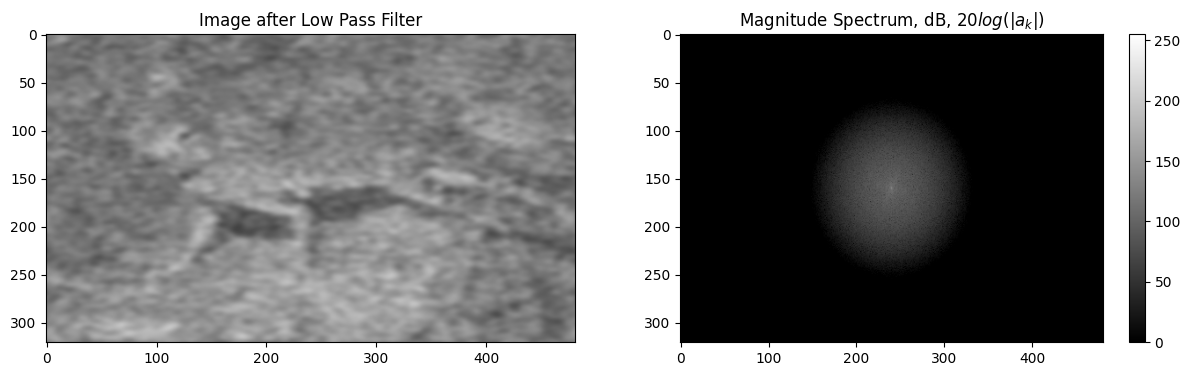

In [ ]:
analyze_image('./data/lizard_noisy.png', noise=0, cx=20, cy=20)